 imgGray :  (960, 1280)


Text(0.5, 1.0, 'Original Image(Color)(960, 1280, 3)')

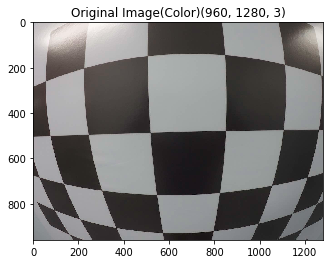

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# print(' objpoints: ', type(objpoints), len(objpoints),objpoints[0].shape, '\n',objpoints[0])
# print(' imgpoints: ', type(imgpoints), len(imgpoints),imgpoints[0].shape, '\n',imgpoints[0])

# Read in an image
img = cv2.imread('test_image.png')

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(' imgGray : ',imgGray.shape)

plt.imshow(img)
plt.title('Original Image(Color)'+str(img.shape), fontsize=12)


In [2]:
# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(inputImg, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
#     imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, inputImg.shape[1::-1], None, None)
    print(' ret:   ', ret)
    print(' mtx:   ', mtx.shape)
    print(' dist:  ', dist.shape)
    print(' rvecs: ', type(rvecs), len(rvecs), rvecs[0].shape)
    print(' tvecs: ', type(tvecs), len(tvecs), tvecs[0].shape)
    undist = cv2.undistort(inputImg, mtx, dist, None, mtx)
    return undist

In [3]:
undistorted = cal_undistort(img, objpoints, imgpoints)

 ret:    0.5662874944101867
 mtx:    (3, 3)
 dist:   (1, 5)
 rvecs:  <class 'list'> 35 (3, 1)
 tvecs:  <class 'list'> 35 (3, 1)


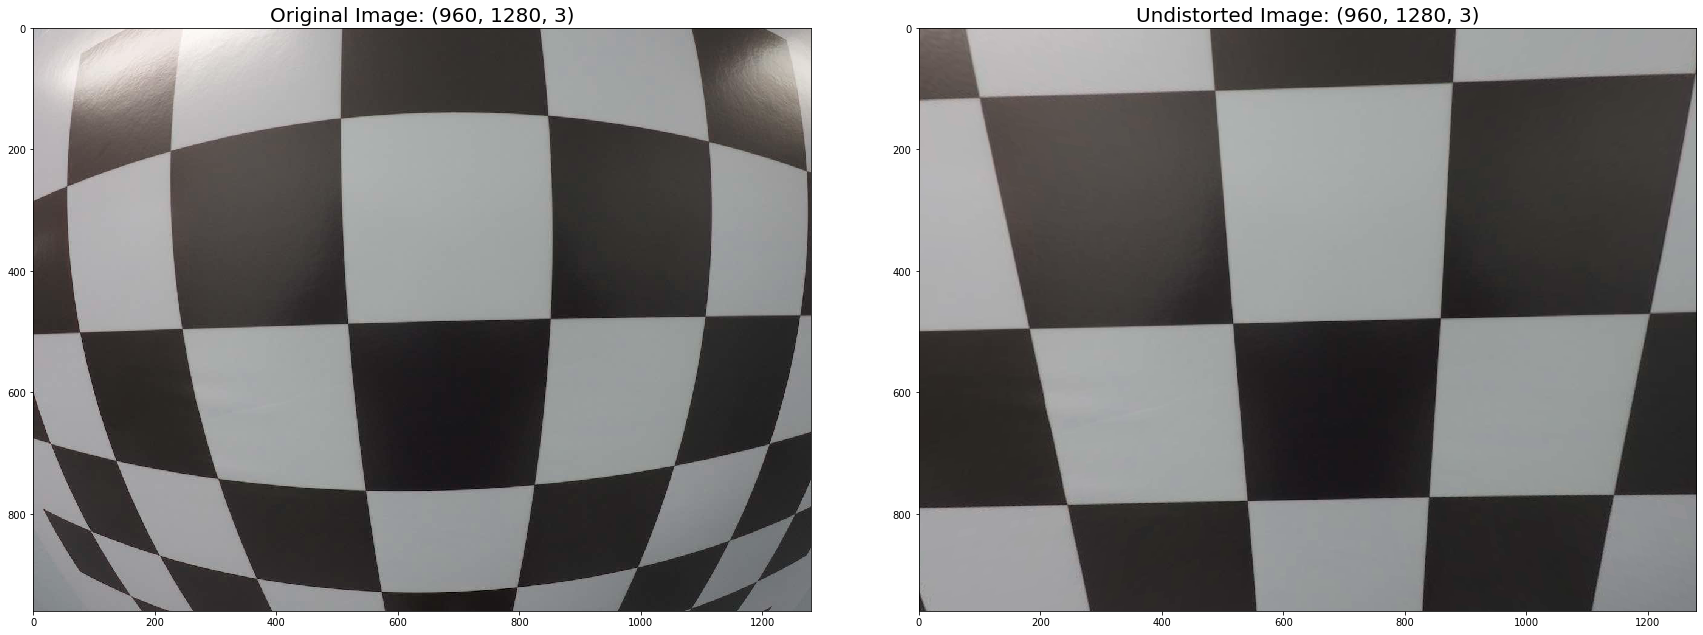

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image: '+str(img.shape), fontsize=20)

ax2.imshow(undistorted)
ax2.set_title('Undistorted Image: '+str(undistorted.shape), fontsize=20)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)